## 데이터 살펴보기
- 데이콘 Basic 전화 해지 여부 분류 AI 경진대회 데이터  
https://dacon.io/competitions/official/236075/overview/description
- 평가산식 : Macro F1 Score
- Public 평가 : 전체 Test 데이터 100%로 채점

- 전화해지여부: 0(서비스 유지)/ 1(서비스 해지)

In [1]:
# 데이터 있는 경로 절대경로 설정하기
import os
os.getcwd()
os.chdir(os.getcwd())

In [2]:
# 라이브러리 
import pandas as pd
import sklearn
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
#데이터 불러오기
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
sample_submission = pd.read_csv('./sample_submission.csv')

In [31]:
train.shape , test.shape , sample_submission.shape

((30200, 14), (12943, 13), (12943, 2))

In [32]:
train.head()

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0


In [33]:
# ID열은 인덱스 열로 지정하기
train = train.set_index('ID')
test = test.set_index('ID')

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30200 entries, TRAIN_00000 to TRAIN_30199
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   가입일      30200 non-null  int64  
 1   음성사서함이용  30200 non-null  int64  
 2   주간통화시간   30200 non-null  float64
 3   주간통화횟수   30200 non-null  int64  
 4   주간통화요금   30200 non-null  float64
 5   저녁통화시간   30200 non-null  float64
 6   저녁통화횟수   30200 non-null  int64  
 7   저녁통화요금   30200 non-null  float64
 8   밤통화시간    30200 non-null  float64
 9   밤통화횟수    30200 non-null  int64  
 10  밤통화요금    30200 non-null  float64
 11  상담전화건수   30200 non-null  int64  
 12  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 3.2+ MB


In [35]:
print(train.describe())

                가입일       음성사서함이용        주간통화시간        주간통화횟수        주간통화요금  \
count  30200.000000  30200.000000  30200.000000  30200.000000  30200.000000   
mean     159.732649     12.037815    250.563457    159.175728     41.091447   
std      123.752781     24.925334     84.403350    101.573057     23.179017   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%       63.000000      0.000000    222.800000     88.000000     24.400000   
50%      118.000000      1.000000    234.000000    117.500000     30.800000   
75%      228.000000     22.000000    289.600000    223.000000     45.900000   
max     2212.000000   1112.000000    481.900000    489.000000    118.600000   

             저녁통화시간        저녁통화횟수        저녁통화요금         밤통화시간         밤통화횟수  \
count  30200.000000  30200.000000  30200.000000  30200.000000  30200.000000   
mean     263.247215    158.474536     25.394260    263.438285    157.047417   
std       74.064922    102.200293      8.146126    

In [36]:
train.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
count,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000
mean,159.732649,12.037815,250.563457,159.175728,41.091447,263.247215,158.474536,25.394260,263.438285,157.047417,12.074648,2.288079,0.109868
std,123.752781,24.925334,84.403350,101.573057,23.179017,74.064922,102.200293,8.146126,73.778416,101.721601,9.414261,2.050746,0.312730
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,20.800000,20.000000,1.040000,0.000000,0.000000
25%,63.000000,0.000000,222.800000,88.000000,24.400000,223.700000,87.000000,22.220000,223.700000,87.000000,4.700000,2.000000,0.000000
50%,118.000000,1.000000,234.000000,117.500000,30.800000,243.000000,112.000000,23.320000,242.800000,108.000000,9.080000,2.000000,0.000000
75%,228.000000,22.000000,289.600000,223.000000,45.900000,290.300000,223.000000,28.820000,290.500000,222.000000,20.290000,2.000000,0.000000
max,2212.000000,1112.000000,481.900000,489.000000,118.600000,481.600000,489.000000,49.980000,481.800000,490.000000,44.980000,11.000000,1.000000


- 평균 가입일수는 160일정도(5~6개월)
- 통화횟수 평균을 비교해보면 주간(159) > 저녁(158) > 밤(157)
    - 하루일과가 끝나고 저녁에 통화를 가장 많이 할 것이라 생각했는데 주간, 저녁, 밤 차이가 크지 않다..?
    - 비슷한 양상을 보임

- 통화시간 평균을 비교해보면 밤(263.43) >저녁(263.24) > 주간(250)
    - 큰 차이는 아니지만 횟수와 반대로 나타남
    - 저녁, 밤에는 지인들과 통화로 이야기 ↑ but 낮에는 업무전화로 횟수는 많지만 시간은 짧은거 아닐까?
    
- 통화 요금 평균을 비교해보면 주간(41) >> 저녁(25.39) >> 밤(12.07)
    - 요금에서 가장 차이가 많이 나타남
    - 밤에 전화를 많이 하는 사람들은 해지할 가능성이 적지 않을까?
    - 그렇다고 주간에 업무 전화하는 사람들이 요금이 조금 더 높다고 전화를 해지할 수 있을꺼 같지는 않다.
    - 그럼 어떤 특성을 가진 사람들이 해지할까

- 

**궁금증**
- 통화시간, 통화요금 모두 '분' 단위로 구성되어있음
- 저녁, 밤통화횟수는 가입한 일로부터 지금까지 총 횟수를 의미하는 걸까?
    - 가입일에 비례하는 변수이지 않을까?

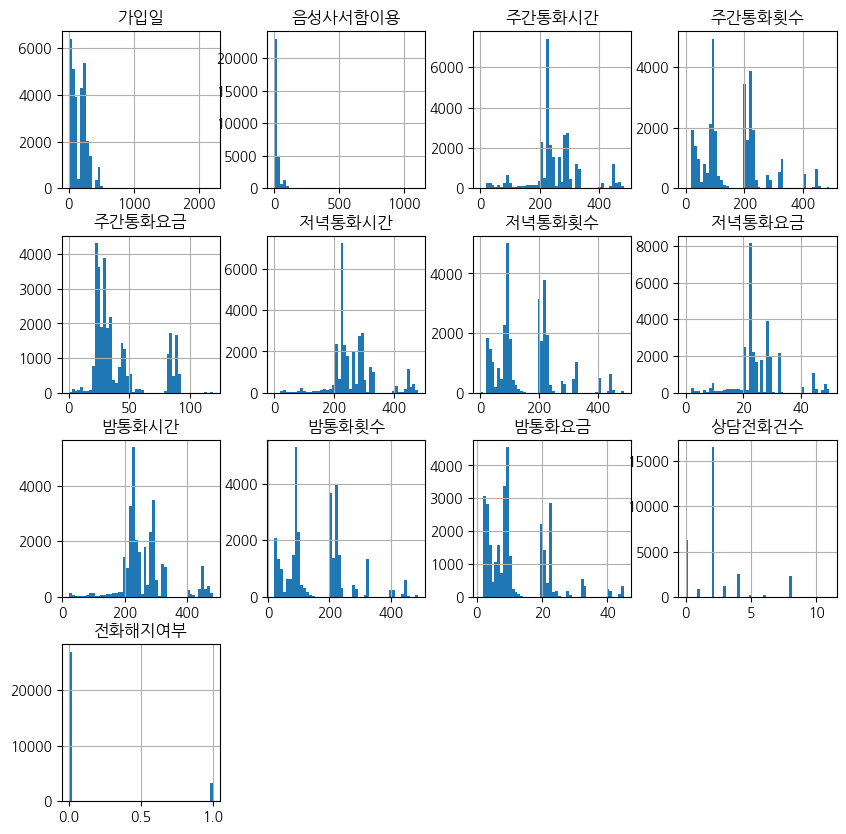

In [37]:
# 특별히 눈에 띄는 분포를 가지는 변수는 확인되지 않음
train.hist(bins=50 , figsize=(10,10));
plt.savefig('./train_hist.png')

In [38]:
# 종속변수인 '전화해지여부'는 0과 1로 구성된 범주형 변수
train['전화해지여부'].value_counts()

0    26882
1     3318
Name: 전화해지여부, dtype: int64

In [39]:
# train 데이터에서 약 11%의 고객이 전화 해지함
train['전화해지여부'].value_counts(1)

0    0.890132
1    0.109868
Name: 전화해지여부, dtype: float64

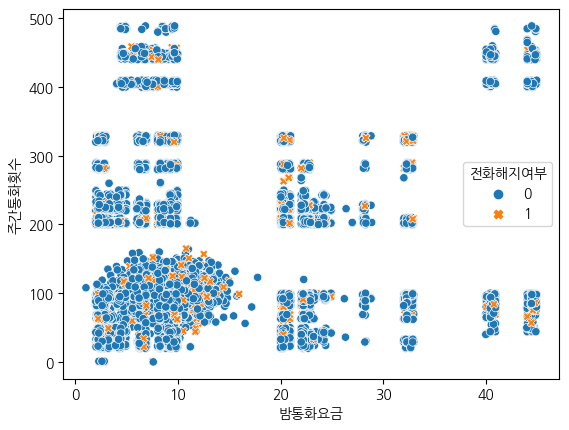

In [40]:
# 불균형 데이터 → 샘플링 실시
sns.scatterplot(data=train, x='밤통화요금', y='주간통화횟수',
                hue='전화해지여부',
                style='전화해지여부'
               )
plt.savefig('./train_scatter.png')

## EDA

**결측치, 중복값 확인**

In [41]:
# 결측치 확인
train.isnull().sum().sum()

0

In [42]:
# 중복값
train.duplicated().sum()

0

**이상치 확인**  
- 극단적인 이상값: 가입일 이상치 대체하기

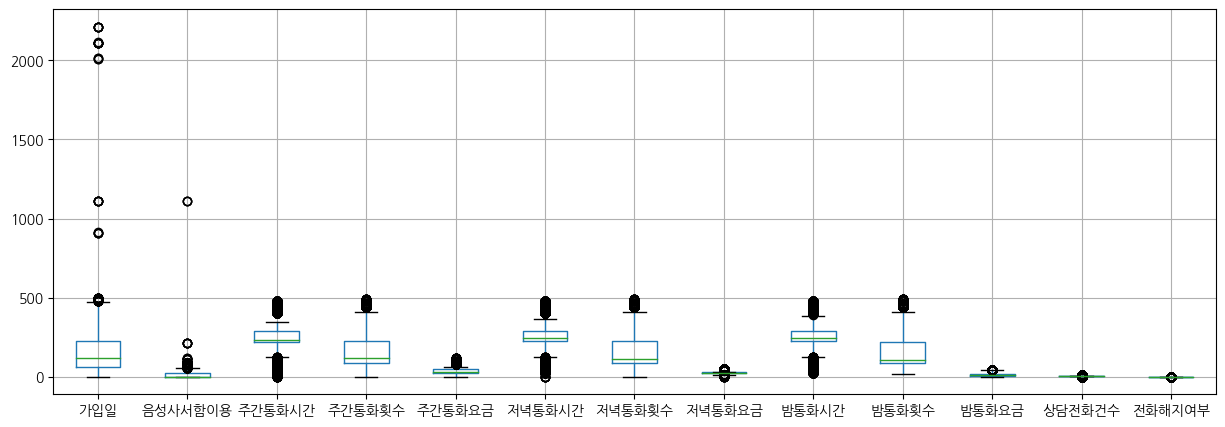

In [43]:
train.boxplot(figsize=(15,5))
plt.savefig('./train_box.png')

### 가입일 이상치 처리

In [44]:
#IQR 이용해서 이상치 구하기
q3 = train.quantile(0.75) 
q1 = train.quantile(0.25)
iqr = q3 - q1
out_cut = iqr * 1.5

# lower , upper bound
lower , upper = q1 - out_cut , q3 + out_cut

In [45]:
# 가입일 이상치
out_day1 = train["가입일"] > upper[0]
out_day2 = train["가입일"] < lower[0]
count_true = sum(out_day1) + sum(out_day2)

print(f"가입일의 이상치의 총 개수는 {count_true}개 입니다.")

가입일의 이상치의 총 개수는 214개 입니다.


In [46]:
# 이상치에 해당되는 행 인덱스 구하기
out_index = train.index[out_day1 == True].tolist()

# 전체 데이터프레임에서 행인덱스를 이용하여 가입일 이상치인 행 추출하기
train.loc[out_index]

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
ID,,,,,,,,,,,,,
TRAIN_00061,488,0,444.9,489,45.1,449.1,444,49.4400,446.0,409,8.480,4,1
TRAIN_00119,489,0,444.5,449,45.8,450.4,68,44.4800,444.8,84,9.840,4,0
TRAIN_00361,485,1,445.5,405,45.7,469.8,95,44.8600,406.2,448,9.840,4,0
TRAIN_00384,911,0,228.5,63,117.8,202.5,221,22.6110,223.1,221,9.911,2,1
TRAIN_00405,2110,0,222.9,222,117.0,292.8,120,26.1111,223.8,99,20.920,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_29805,480,1,445.3,408,89.5,480.6,405,44.4800,448.4,48,9.440,8,0
TRAIN_29951,485,0,446.2,444,90.1,402.3,100,44.0600,447.6,448,8.480,4,0
TRAIN_30046,480,49,446.6,441,51.1,445.8,98,48.4900,441.5,64,9.940,4,0


In [47]:
train.loc[train['가입일']<=1000].sort_values(by='가입일',ascending= False).head(2)

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
ID,,,,,,,,,,,,,
TRAIN_23074,912,0,70.2,29,23.4,290.4,210,26.22,231.0,202,9.9,0,0
TRAIN_28032,911,1,70.5,29,24.1,292.1,210,26.22,231.3,203,9.9,0,0


In [48]:
# 가입일 1000 이상(25개) → 이상치 대체: 상한값(912)으로 대체
train.loc[train['가입일']>=1000,'가입일'] = 912

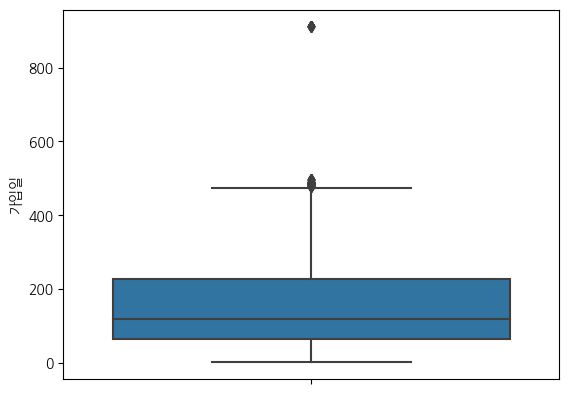

In [49]:
sns.boxplot(y='가입일', data = train)
plt.savefig('./train_가입.png')

### 음성사서함 이상치

In [50]:
#IQR 이용해서 이상치 구하기
q3 = train.quantile(0.75) 
q1 = train.quantile(0.25)
iqr = q3 - q1
out_cut = iqr * 1.5

# lower , upper bound
lower , upper = q1 - out_cut , q3 + out_cut

In [51]:
# 음성사서함이용 이상치
out_voice1 = train["음성사서함이용"] > upper[1]
out_voice2 = train["음성사서함이용"] < lower[1]
count_true = sum(out_voice1) + sum(out_voice2)

print(f"음성사서함이용의 이상치의 총 개수는 {count_true}개 입니다.")

음성사서함이용의 이상치의 총 개수는 1793개 입니다.


In [52]:
train.loc[train['음성사서함이용']<=1000].sort_values(by='음성사서함이용',ascending= False).head(2)

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
ID,,,,,,,,,,,,,
TRAIN_20070,911,212,260.4,112,23.6,203.5,202,22.200,293.2,223,11.60,0,0
TRAIN_28822,222,212,230.8,23,24.8,291.0,220,22.611,222.6,220,2.92,2,0


In [53]:
# 음성사서함이용 1000 이상(3개) → 이상치 대체: 상한값(212)으로 대체
train.loc[train['음성사서함이용']>=1000,'음성사서함이용'] = 212

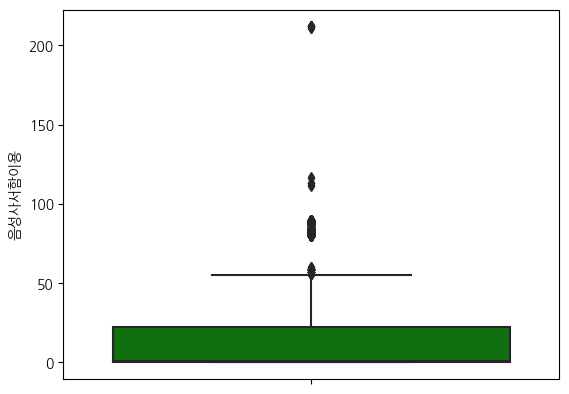

In [54]:
sns.boxplot(y='음성사서함이용', data = train , color='green')
plt.savefig('./train_음성.png')

### 새로운 변수 생성해보기

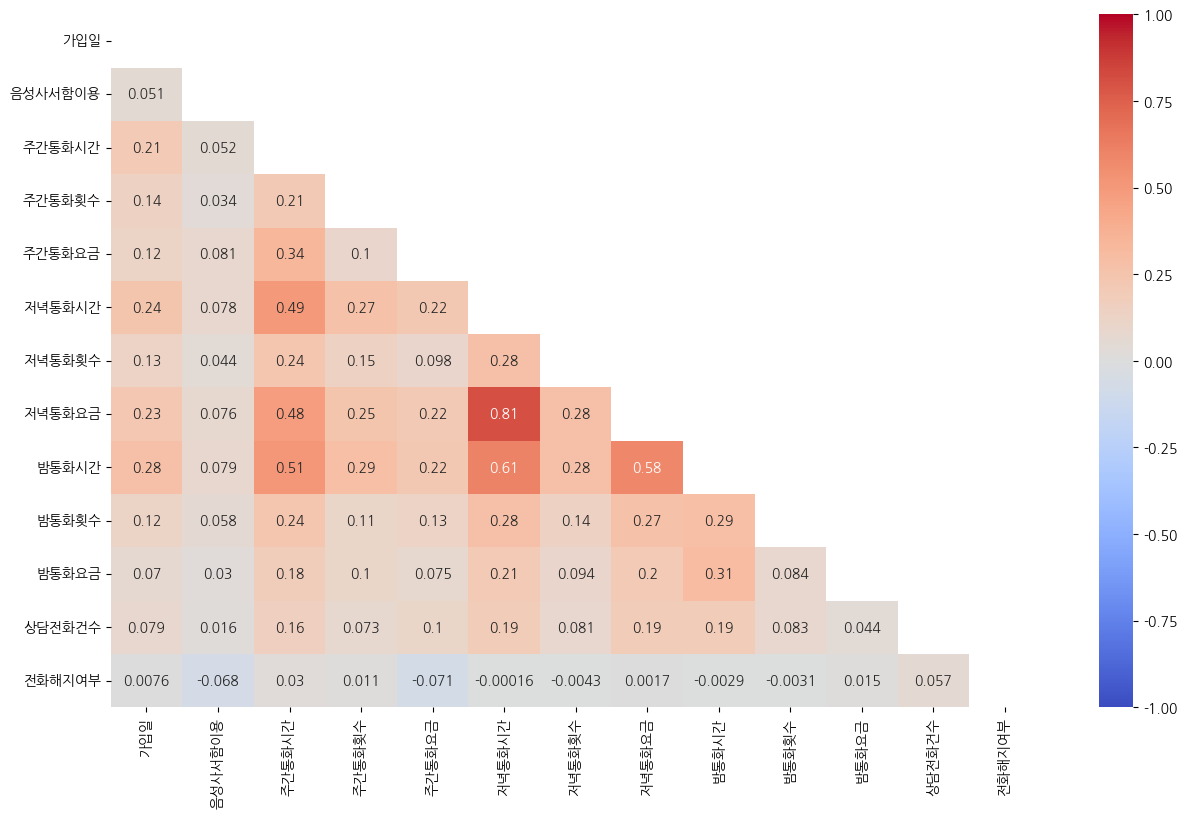

In [56]:
# 상관계수 시각화
plt.figure(figsize=(15,9))
mask = np.triu(np.ones_like(train.corr()))
sns.heatmap(train.corr(), annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1);

In [57]:
# 총통화요금
train['총통화요금'] = train['주간통화요금'] + train['저녁통화요금'] + train['밤통화요금']
# 총통화시간
train['총통화시간'] = train['주간통화시간'] + train['저녁통화시간'] + train['밤통화시간']
# 총통화횟수
train['총통화횟수'] = train['주간통화횟수'] + train['저녁통화횟수'] + train['밤통화횟수']

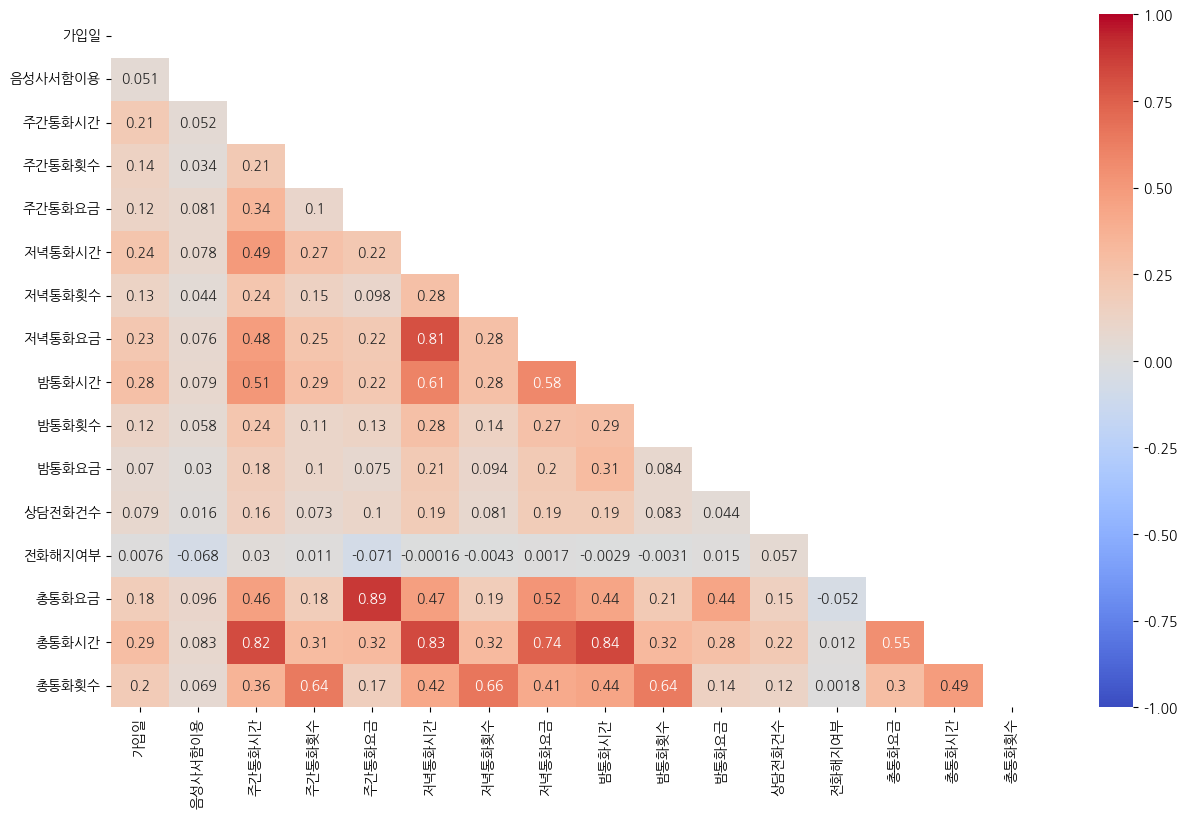

In [58]:
# 상관계수 시각화
plt.figure(figsize=(15,9))
mask = np.triu(np.ones_like(train.corr()))
sns.heatmap(train.corr(), annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1);

In [59]:
# 전화해지여부와 다른 변수간의 상관계수 -> 높은 상관관계없음
train.corr()['전화해지여부'].sort_values(ascending = False)

전화해지여부     1.000000
상담전화건수     0.057114
주간통화시간     0.029975
밤통화요금      0.014513
총통화시간      0.011960
주간통화횟수     0.010974
가입일        0.007633
총통화횟수      0.001818
저녁통화요금     0.001711
저녁통화시간    -0.000163
밤통화시간     -0.002872
밤통화횟수     -0.003121
저녁통화횟수    -0.004276
총통화요금     -0.051642
음성사서함이용   -0.068173
주간통화요금    -0.071006
Name: 전화해지여부, dtype: float64

In [60]:
train = train.drop(['주간통화시간','저녁통화시간','밤통화시간','주간통화횟수','저녁통화횟수','밤통화횟수',
            '주간통화요금','저녁통화요금','밤통화요금'],axis = 1)
train.head()

,가입일,음성사서함이용,상담전화건수,전화해지여부,총통화요금,총통화시간,총통화횟수
ID,,,,,,,
TRAIN_00000,329,0,2,0,89.11,630.9,489
TRAIN_00001,2,80,2,0,148.11,916.1,858
TRAIN_00002,93,28,0,0,75.30,770.2,973
TRAIN_00003,223,1,0,0,58.36,658.2,518
TRAIN_00004,222,0,8,0,59.58,583.3,514


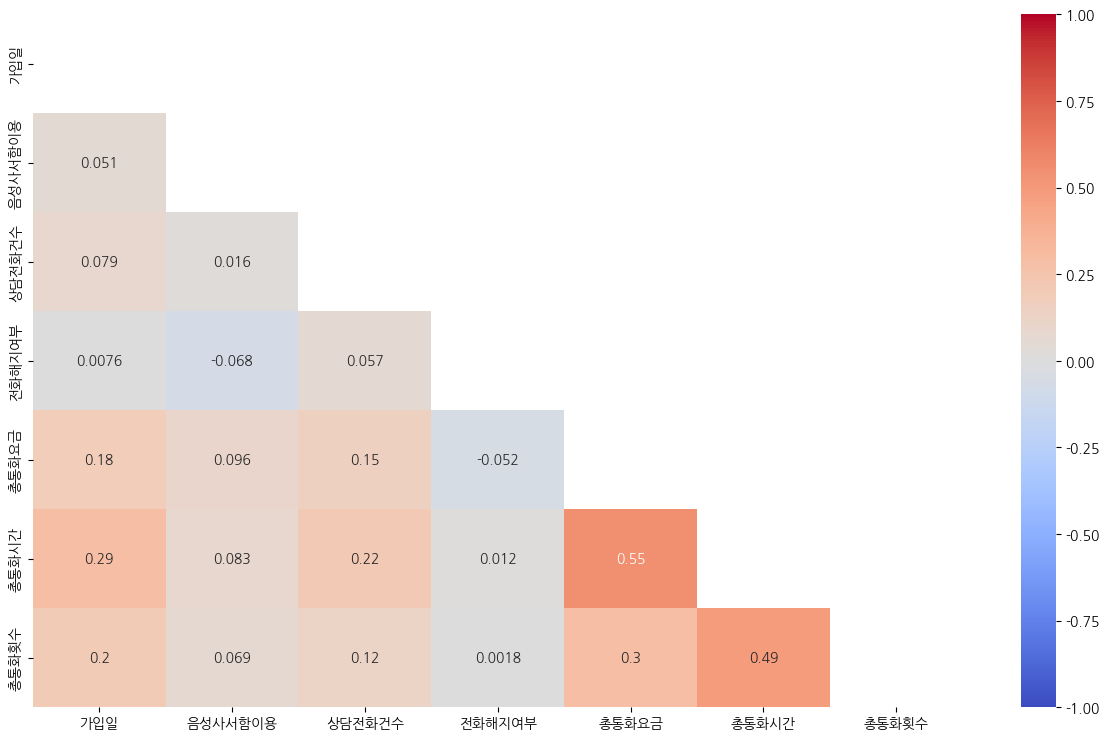

In [61]:
# 상관계수 시각화
plt.figure(figsize=(15,9))
mask = np.triu(np.ones_like(train.corr()))
sns.heatmap(train.corr(), annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1);
plt.savefig('./train_상관1.png')

### StandardScaler 표준화

In [62]:
# 독립, 종속변수 분리
X_train = train.drop('전화해지여부',axis = 1)
y_train = train['전화해지여부']

In [63]:
# 숫자형 데이터 표준화(StandardScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)

X_train

array([[ 1.48154335, -0.53161028, -0.14047776,  0.36435862, -0.75902355,
         0.07219523],
       [-1.36710807,  3.0277407 , -0.14047776,  2.40207272,  0.7201364 ,
         1.9348333 ],
       [-0.5743641 ,  0.71416256, -1.11574866, -0.11260463, -0.03655868,
         2.51533025],
       ...,
       [-1.17545568, -0.53161028, -0.14047776, -1.03682885, -0.1418425 ,
        -1.58853084],
       [-0.83570826, -0.4871184 , -0.14047776,  0.02761773,  0.24195075,
         1.09185076],
       [ 0.35776343, -0.4871184 , -1.11574866,  1.49891639,  0.87676554,
         0.67288339]])

### test 데이터에도 동일하게 전처리 실행

In [64]:
# 가입일 1000 이상 → 이상치 대체: 상한값(912)으로 대체
test.loc[test['가입일']>=1000,'가입일'] = 912

In [65]:
# 음성사서함이용 1000 이상 → 이상치 대체: 상한값(212)으로 대체
test.loc[test['음성사서함이용']>=1000,'음성사서함이용'] = 212

In [66]:
# 총통화요금
test['총통화요금'] = test['주간통화요금'] + test['저녁통화요금'] + test['밤통화요금']
# 총통화시간
test['총통화시간'] = test['주간통화시간'] + test['저녁통화시간'] + test['밤통화시간']
# 총통화횟수
test['총통화횟수'] = test['주간통화횟수'] + test['저녁통화횟수'] + test['밤통화횟수']

In [67]:

test = test.drop(['주간통화시간','저녁통화시간','밤통화시간','주간통화횟수','저녁통화횟수','밤통화횟수',
            '주간통화요금','저녁통화요금','밤통화요금'],axis = 1)
test.head()

,가입일,음성사서함이용,상담전화건수,총통화요금,총통화시간,총통화횟수
ID,,,,,,
TEST_00000,110,0,2,58.40,537.5,346
TEST_00001,283,1,0,67.44,841.5,281
TEST_00002,34,1,2,52.74,561.6,439
TEST_00003,209,86,6,49.79,620.5,394
TEST_00004,202,0,2,64.05,811.0,80


In [68]:
# 테스트 데이터 숫자형 데이터 표준화(StandardScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
test = scaler.fit_transform(test)

test

array([[-0.43146662, -0.53231054, -0.14643447, -0.68894644, -1.2404147 ,
        -0.6539674 ],
       [ 1.07864296, -0.48833357, -1.11788566, -0.37789342,  0.32247046,
        -0.97825193],
       [-1.09486737, -0.48833357, -0.14643447, -0.88369866, -1.11651492,
        -0.18999108],
       ...,
       [-0.53621411,  0.74302146, -0.14643447,  0.06735283, -0.52169317,
         0.7130166 ],
       [-1.19088589,  0.78699843, -1.11788566, -0.74193556, -0.41167428,
        -0.64398942],
       [-1.14724111,  0.4351827 , -0.14643447, -1.02374133, -0.33610055,
         0.19416136]])

## 언더 샘플링

- RandomUnderSampler

In [69]:
# 라이브버리 import
from imblearn.under_sampling import RandomUnderSampler

# undersampling 정의
undersample = RandomUnderSampler() 

# Fit and apply undersampling to the dataset
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

# 각 데이터의 shape 출력
print('Original dataset shape:', X_train.shape, y_train.shape)
print('Resampled dataset shape:', X_resampled.shape, y_resampled.shape)

Original dataset shape: (30200, 6) (30200,)
Resampled dataset shape: (6636, 6) (6636,)


## 모델 학습
1. RandomForestClassifier

In [ ]:
!pip install -U imbalanced-learn

In [71]:
# GridSearchCV 이용하여 파이퍼 파라미터 결정
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params ={
    'n_estimators':[100,200,300],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20],
    'criterion':['gini']
    }
    
forest_clf = RandomForestClassifier(random_state=42)

grid_cv = GridSearchCV(forest_clf, param_grid=params, scoring="f1_macro", n_jobs = -1 , cv = 10)
grid_cv.fit(X_resampled,y_resampled)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_macro')

In [72]:
grid_cv.best_estimator_

RandomForestClassifier(max_depth=12, min_samples_leaf=8, min_samples_split=20,
                       n_estimators=200, random_state=42)

In [73]:
rf_1=RandomForestClassifier(n_estimators=200, max_depth=12, min_samples_leaf=8,
                           min_samples_split=20, random_state=42)

In [78]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(rf_1, X_resampled, y_resampled, scoring='f1', cv=10)
forest_scores = forest_scores.mean()
forest_scores

0.686177822170251

In [79]:
rf_1.fit(X_resampled,y_resampled)
pred=rf_1.predict(test)

In [80]:
# submit
sample_submission["전화해지여부"] = pred
sample_submission.head(2)

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,1


In [81]:
# 캐글에 제출
file_name = f'./under_randomforest_{forest_scores:.5f}.csv'
sample_submission.to_csv(file_name,index = False)

2. QDA 분석

In [82]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_model = QuadraticDiscriminantAnalysis()

In [83]:
from sklearn.model_selection import cross_val_score

qda_scores = cross_val_score(qda_model, X_resampled, y_resampled, scoring='f1', cv=10)
qda_scores = qda_scores.mean()
qda_scores

0.6505341198730121

In [84]:
qda_model.fit(X_resampled,y_resampled)
pred_qda=qda_model.predict(test)

In [85]:
# submit
sample_submission = pd.read_csv('./sample_submission.csv')
sample_submission["전화해지여부"] = pred_qda
sample_submission.head(2)

,ID,전화해지여부
0,TEST_00000,1
1,TEST_00001,1


In [86]:
# 캐글에 제출
file_name = f'./under_qda_{qda_scores:.5f}.csv'
sample_submission.to_csv(file_name,index = False)

3. Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
Logistic_model = LogisticRegression()

In [88]:
from sklearn.model_selection import cross_val_score

Logistic_scores = cross_val_score(Logistic_model, X_resampled, y_resampled, scoring='f1', cv=10)
Logistic_scores = Logistic_scores.mean()
Logistic_scores

0.6033691374769441

In [89]:
Logistic_model.fit(X_resampled,y_resampled)
pred_Logistic=Logistic_model.predict(test)

In [90]:
# submit
sample_submission = pd.read_csv('./sample_submission.csv')
sample_submission["전화해지여부"] = pred_Logistic
sample_submission.head(2)

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,1


In [91]:
# 캐글에 제출
file_name = f'./under_Logistic_{Logistic_scores:.5f}.csv'
sample_submission.to_csv(file_name,index = False)

4. AutoGluon

In [63]:
!pip install autogluon

  Using cached autogluon-0.7.0-py3-none-any.whl (9.7 kB)
  Using cached autogluon.multimodal-0.7.0-py3-none-any.whl (331 kB)
  Using cached autogluon.core-0.7.0-py3-none-any.whl (218 kB)
  Using cached autogluon.tabular-0.7.0-py3-none-any.whl (292 kB)
  Using cached autogluon.features-0.7.0-py3-none-any.whl (60 kB)
  Using cached autogluon.timeseries-0.7.0-py3-none-any.whl (108 kB)
     -------------------------------------- 135.5/135.5 kB 7.8 MB/s eta 0:00:00
  Using cached autogluon.common-0.7.0-py3-none-any.whl (45 kB)
  Using cached hyperopt-0.2.7-py2.py3-none-any.whl (1.6 MB)
     --------------------------------------- 20.8/20.8 MB 11.1 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 10.3 MB/s eta 0:00:00
  Using cached pytorch_lightning-1.9.4-py3-none-any.whl (827 kB)
  Using cached torchmetrics-0.8.2-py3-none-any.whl (409 kB)
  Using cached nlpaug-1.1.11-py3-none-any.whl (410 kB)
  Using cached nptyping-2.4.1-py3-none-any.whl (36 kB)
  Using cached fai

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder-kernels 2.4.1 requires ipykernel<7,>=6.16.1; python_version >= "3", but you have ipykernel 6.15.3 which is incompatible.
jupyter-console 6.6.2 requires jupyter-core!=5.0.*,>=4.12, but you have jupyter-core 4.11.1 which is incompatible.


In [92]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [93]:
re_df_y = pd.DataFrame(y_resampled)

In [94]:
re_df_X = pd.DataFrame(X_resampled)

In [95]:
re_df = pd.concat([re_df_X,re_df_y],axis=1, ignore_index=True)
re_df.rename(columns={6:'전화해지여부'},inplace=True)
re_df.head(2)

,0,1,2,3,4,5,전화해지여부
0,-0.670190,0.714163,-1.115749,-0.454872,1.100818,0.617358,0
1,-0.426269,-0.487118,-0.140478,-0.755693,-1.261585,-0.902030,0


In [96]:
predictor = TabularPredictor(label='전화해지여부', eval_metric='f1_macro').fit(train_data=re_df)

No path specified. Models will be saved in: "AutogluonModels\ag-20230326_074807\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230326_074807\"
AutoGluon Version:  0.7.0
Python Version:     3.10.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22000
Train Data Rows:    6636
Train Data Columns: 6
Label Column: 전화해지여부
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1627.24 MB
	Train Data (Original)  Memory Usage: 0.32 MB (0.

In [97]:
predictor.get_model_best()

'WeightedEnsemble_L2'

In [98]:
# 각각의 모델의 훈련 성능을 평가할 수 있음
ld_board = predictor.leaderboard(re_df, silent=True)

ld_board

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForestGini,0.974532,0.745060,0.181139,0.044982,0.853064,0.181139,0.044982,0.853064,1,True,5
1,RandomForestEntr,0.974382,0.743380,0.177462,0.049142,1.180412,0.177462,0.049142,1.180412,1,True,6
2,ExtraTreesGini,0.973779,0.737485,0.231948,0.046647,0.606415,0.231948,0.046647,0.606415,1,True,8
3,ExtraTreesEntr,0.972272,0.722246,0.332421,0.048542,0.745105,0.332421,0.048542,0.745105,1,True,9
4,WeightedEnsemble_L2,0.966996,0.751094,0.301196,0.063932,7.227631,0.007425,0.001992,1.720223,2,True,14
5,LightGBMLarge,0.954480,0.749555,0.055653,0.010072,2.099439,0.055653,0.010072,2.099439,1,True,13
6,KNeighborsDist,0.949347,0.693158,0.035506,0.005592,0.007372,0.035506,0.005592,0.007372,1,True,2
7,XGBoost,0.936845,0.736311,0.070395,0.012021,2.024699,0.070395,0.012021,2.024699,1,True,11
8,LightGBM,0.930509,0.731379,0.077583,0.009362,1.592626,0.077583,0.009362,1.592626,1,True,4
9,CatBoost,0.925823,0.729582,0.029831,0.004958,8.211673,0.029831,0.004958,8.211673,1,True,7


In [99]:
test_auto = TabularDataset(test)

In [100]:
pred_WeightedEnsemble = predictor.predict(test_auto)

In [101]:
# submit
sample_submission = pd.read_csv('./sample_submission.csv')
sample_submission["전화해지여부"] = pred_WeightedEnsemble
sample_submission.head(2)

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,1


In [102]:
# 캐글에 제출
file_name = f'./under_autogluon(WeightEnsemble)_0.75.csv'
sample_submission.to_csv(file_name,index = False)

5. SVC

In [103]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, X_resampled,y_resampled, scoring='f1', cv=10)
svm_scores = svm_scores.mean()

In [107]:
svm_scores

0.6503137073320745

In [104]:
svm_clf.fit(X_resampled,y_resampled)
pred_svm=svm_clf.predict(test)

In [105]:
# submit
sample_submission = pd.read_csv('./sample_submission.csv')
sample_submission["전화해지여부"] = pred_svm
sample_submission.head(2)

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,1


In [106]:
# 캐글에 제출
file_name = f'./under_svm_{svm_scores:.5f}.csv'
sample_submission.to_csv(file_name,index = False)

6. XGBoost

In [ ]:
#필요한 라이브러리 임포트
from xgboost import XGBClassifier

xgb= XGBClassifier()

xgb_param_grid={
    'n_estimators' : [100,200,300],
    'learning_rate' : [0.01,0.05,0.1,0.15],
    'max_depth' : [6,8,10,12],
    'gamma' : [0,1,2,3]
}

xgb_grid=GridSearchCV(xgb, param_grid = xgb_param_grid, scoring="f1_macro", n_jobs=-1, cv = 10)
xgb_grid.fit(X_resampled,y_resampled)

In [77]:
#best f1_macro 수치와 best parameter확인
print("best f1_macro : {0: .4f}".format(xgb_grid.best_score_))
print("best param : ",xgb_grid.best_params_)

#dataframe으로 랭킹순보기
result_df = pd.DataFrame(xgb_grid.cv_results_)
result_df.sort_values(by=['rank_test_score'],inplace=True)

#plot
result_df[['params','mean_test_score','rank_test_score']].head(10)

best f1_macro :  0.7340
best param :  {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.15, 'max_depth': 15, 'n_estimators': 400}


,params,mean_test_score,rank_test_score
498,"{'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.15, 'max_depth': 15, 'n_estimators': 400}",0.733985,1
499,"{'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.15, 'max_depth': 15, 'n_estimators': 500}",0.732149,2
449,"{'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 500}",0.731870,3
496,"{'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.15, 'max_depth': 15, 'n_estimators': 200}",0.731868,4
497,"{'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.15, 'max_depth': 15, 'n_estimators': 300}",0.731746,5
448,"{'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 400}",0.731262,6
71,"{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 200}",0.730676,7
471,"{'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 200}",0.730598,8
495,"{'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.15, 'max_depth': 15, 'n_estimators': 100}",0.730470,9
472,"{'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 300}",0.729539,10


In [ ]:
xgb_grid.best_score_

In [78]:
pred_xgb=xgb_grid.predict(test)

In [79]:
# submit
sample_submission = pd.read_csv('./sample_submission.csv')
sample_submission["전화해지여부"] = pred_xgb
sample_submission.head(2)

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,0


In [80]:
# 캐글에 제출
file_name = f'./under_xgb_.csv'
sample_submission.to_csv(file_name,index = False)